In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import pickle
%matplotlib inline
from scipy.stats import gaussian_kde

In [2]:
#prob = pd.read_csv('../models/TestSet1Predictions.csv')
prob = pd.read_csv('./anomTestSet2Predictions.csv')
prob_snr = np.load('../models/snr_preds.npy')


In [3]:
prob.columns

Index(['Index', '16PSK', '2FSK_5KHz', '2FSK_75KHz', '8PSK', 'AM_DSB', 'AM_SSB',
       'APSK16_c34', 'APSK32_c34', 'BPSK', 'CPFSK_5KHz', 'CPFSK_75KHz',
       'FM_NB', 'FM_WB', 'GFSK_5KHz', 'GFSK_75KHz', 'GMSK', 'MSK', 'NOISE',
       'OQPSK', 'PI4QPSK', 'QAM16', 'QAM32', 'QAM64', 'QPSK'],
      dtype='object')

In [4]:
pred_snr = np.argmax(prob_snr, axis=1)
pred = prob[prob.columns[1:]].idxmax(axis=1)

In [5]:
testfile = '/home/yunfanz/Dataset2/Test_Set_2_Army_Signal_Challenge.pkl'
trainfile = '/bldata/army_challenge/training_data/training_data_chunk_0.pkl'
ft = open(testfile, 'rb')
ftr = open(trainfile, 'rb')
testdata = pickle.load(ft, encoding='latin-1')
traindata = pickle.load(ftr, encoding='lating-1')

In [34]:
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

PI4QPSK 122


/home/yunfanz/miniconda3/envs/seti/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)


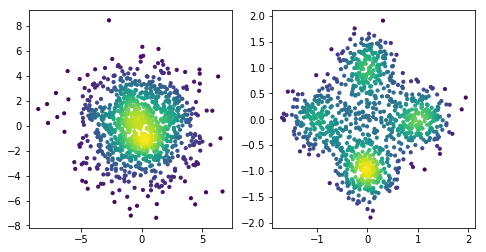

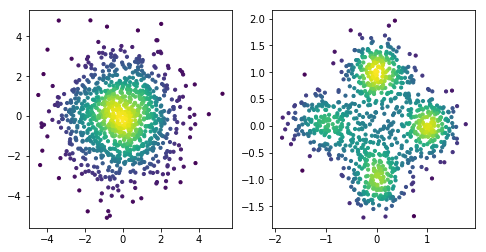

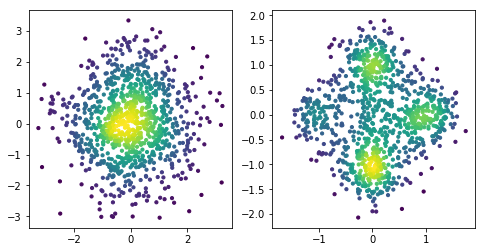

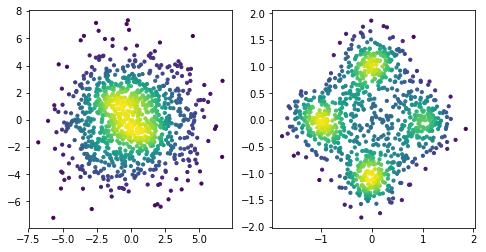

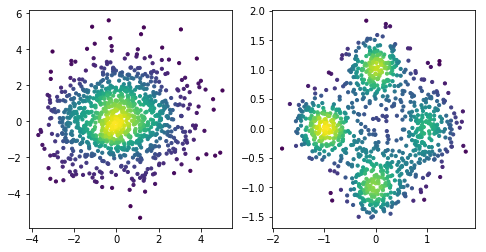

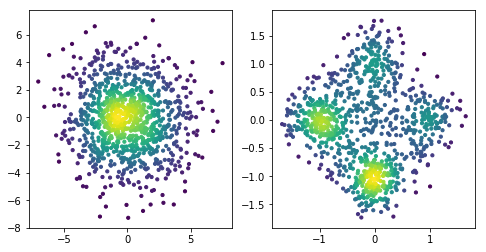

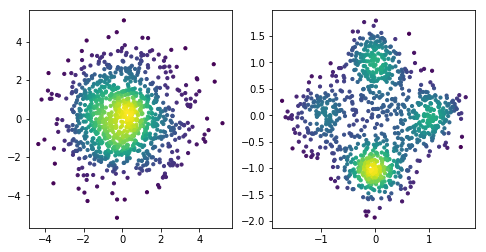

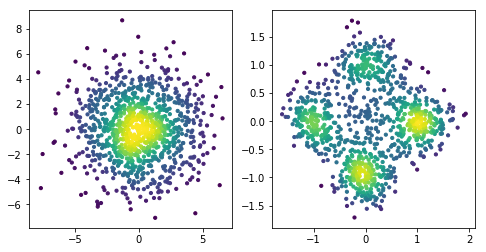

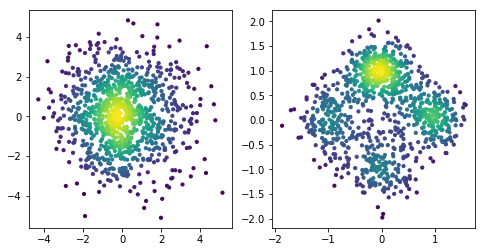

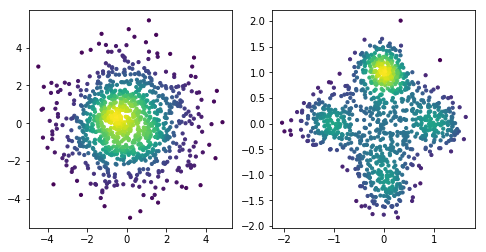

In [35]:
def dense_scatter(x,y, ax):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, c=z, s=10)
    
for MOD in [prob.columns[20]]:
    ind = np.asarray(pred.index[np.logical_and(pred_snr==5, pred==MOD)])
    print(MOD, ind.size)
    for i in range(10,20):
        test_signal = testdata[ind[i]+1]
        train_signal = traindata[(MOD, 10)][i]
        f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
        #f.figsize(8,4)
        
        dense_scatter(test_signal[0], test_signal[1], ax=ax1)
        dense_scatter(train_signal[0], train_signal[1], ax=ax2)
        X = fig2data(f)
        print(X.shape)
    #plt.show()

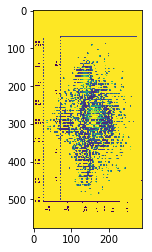

In [40]:
plt.imshow(X[:,:288,0])
plt.show()

In [73]:
8FSK, BPSK, FM, QAM

0             AM_SSB
1         APSK32_c34
2         APSK32_c34
3         2FSK_75KHz
4             AM_SSB
5          2FSK_5KHz
6         2FSK_75KHz
7            PI4QPSK
8         2FSK_75KHz
9            PI4QPSK
10            AM_DSB
11             FM_NB
12             QAM64
13         GFSK_5KHz
14             NOISE
15             16PSK
16        APSK32_c34
17               MSK
18             QAM32
19              8PSK
20              QPSK
21             FM_NB
22             QAM32
23              8PSK
24         GFSK_5KHz
25           PI4QPSK
26        APSK32_c34
27             FM_NB
28             QAM64
29        GFSK_75KHz
            ...     
99970    CPFSK_75KHz
99971           8PSK
99972          16PSK
99973     GFSK_75KHz
99974          QAM32
99975     APSK32_c34
99976          FM_NB
99977      GFSK_5KHz
99978     CPFSK_5KHz
99979          QAM64
99980     APSK32_c34
99981     2FSK_75KHz
99982          QAM64
99983           GMSK
99984     APSK16_c34
99985          QAM16
99986     2FS

In [8]:
gaussian_kde?